In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [303]:
df1=pd.read_excel(r"C:\Users\91907\OneDrive\Documents\Data_Train.xlsx")
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [304]:
df2=pd.read_excel(r"C:\Users\91907\OneDrive\Pictures\Test_set.xlsx")
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [305]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [306]:
df2.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [307]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [308]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# DataFrame Description:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

We have to predic flights ticktes and the features are Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight


# Checking null values

In [309]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [310]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df1['Route']=imp.fit_transform(df1['Route'].values.reshape(-1,1))

In [311]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df1['Total_Stops']=imp.fit_transform(df1['Total_Stops'].values.reshape(-1,1))

In [312]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

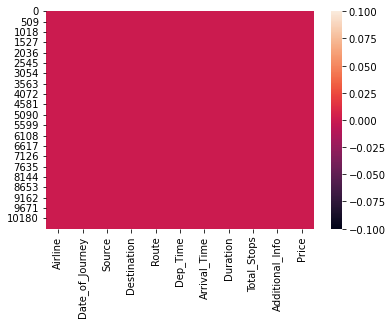

In [313]:
import seaborn as sns
sns.heatmap(df1.isnull())

null values are filled on train data

In [314]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

no null values are present here

In [315]:
import numpy as np

In [316]:
df1[df1.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [317]:
df1.drop_duplicates(keep='first', inplace= True)

In [318]:
df1[df1.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


# Converting-----

In [319]:
df1['Duration']=df1['Duration'].str.replace("h",'60').str.replace(' ','+').str.replace('m','*1').apply(eval) #train

In [320]:
df2['Duration']=df2['Duration'].str.replace("h",'60').str.replace(' ','+').str.replace('m','*1').apply(eval)#test

In [321]:
df1["Journey_day"]=df1['Date_of_Journey'].str.split("/").str[0].astype(int)
df1["Journey_month"]=df1['Date_of_Journey'].str.split("/").str[1].astype(int)

In [322]:
df1["Dep_hour"]=pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"]=pd.to_datetime(df1["Dep_Time"]).dt.hour

In [323]:
df1["Arrival_hour"]=pd.to_datetime(df1.Arrival_Time).dt.hour
df1["Arrival_min"]=pd.to_datetime(df1.Arrival_Time).dt.minute


# Dropingg columns

In [324]:
df1.drop(['Date_of_Journey'],axis=1, inplace= True)


In [325]:
df1.drop(['Dep_Time'],axis=1,inplace= True)

In [326]:
df1.drop(['Arrival_Time'],axis=1,inplace= True)

In [327]:
df1

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,310,non-stop,No info,3897,24,3,22,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,785,2 stops,No info,7662,1,5,5,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1960,2 stops,No info,13882,9,6,9,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,585,1 stop,No info,6218,12,5,18,18,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,505,1 stop,No info,13302,1,3,16,16,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,290,non-stop,No info,4107,9,4,19,19,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,295,non-stop,No info,4145,27,4,20,20,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,360,non-stop,No info,7229,27,4,8,8,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,300,non-stop,No info,12648,1,3,11,11,14,10


# Correlatation

In [329]:
df1.corr()

,Duration,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Duration,1.000000,0.502676,-0.029764,0.005538,-0.001125,-0.001125,0.063286,-0.072978
Price,0.502676,1.000000,-0.159009,-0.113403,0.005174,0.005174,0.031043,-0.086164
Journey_day,-0.029764,-0.159009,1.000000,-0.038351,-0.003343,-0.003343,-0.002394,-0.015087
Journey_month,0.005538,-0.113403,-0.038351,1.000000,0.040390,0.040390,0.001407,-0.099260
Dep_hour,-0.001125,0.005174,-0.003343,0.040390,1.000000,1.000000,-0.003789,0.072987
Dep_min,-0.001125,0.005174,-0.003343,0.040390,1.000000,1.000000,-0.003789,0.072987
Arrival_hour,0.063286,0.031043,-0.002394,0.001407,-0.003789,-0.003789,1.000000,-0.152034
Arrival_min,-0.072978,-0.086164,-0.015087,-0.099260,0.072987,0.072987,-0.152034,1.000000


<AxesSubplot:>

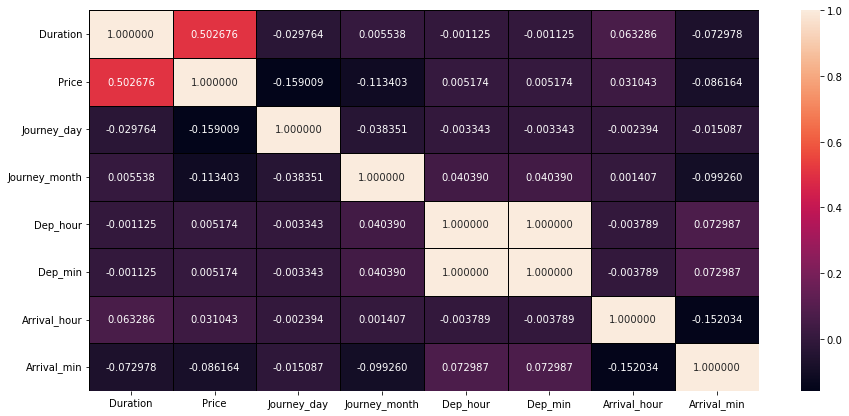

In [331]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

In [328]:
df2["Journey_day"]=df2['Date_of_Journey'].str.split("/").str[0].astype(int)   #test
df2["Journey_month"]=df2['Date_of_Journey'].str.split("/").str[1].astype(int)

In [217]:
df2["Dep_hour"]=pd.to_datetime(df2["Dep_Time"]).dt.hour
df2["Dep_min"]=pd.to_datetime(df2["Dep_Time"]).dt.hour       #test

In [218]:
df2["Arrival_hour"]=pd.to_datetime(df2.Arrival_Time).dt.hour
df2["Arrival_min"]=pd.to_datetime(df2.Arrival_Time).dt.minute #test


In [219]:
df2.drop(['Date_of_Journey'],axis=1, inplace= True)


In [220]:
df2.drop(['Dep_Time'],axis=1,inplace= True)

In [221]:
df2.drop(['Arrival_Time'],axis=1,inplace= True)

In [222]:
df2

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1115,1 stop,No info,6,6,17,17,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,460,1 stop,No info,12,5,6,6,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2405,1 stop,In-flight meal not included,21,5,19,19,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1360,1 stop,No info,21,5,8,8,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,310,non-stop,No info,24,6,23,23,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,2415,1 stop,No info,6,6,20,20,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,295,non-stop,No info,27,3,14,14,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,695,1 stop,No info,6,3,21,21,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1575,1 stop,No info,6,3,4,4,19,15


# Lets see total stops

In [223]:
df1["Total_Stops"].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'], [1,0,2,3,4] , inplace = True)

In [138]:
df2["Total_Stops"].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'], [1,0,2,3,4] , inplace = True)

In [224]:
df1["Airline"].replace({'Multiple carries premium economy':'others','Jet Airways business':"others","vistara premimum economy":'other','Trujet':'Other'},inplace= True)

In [225]:
df2["Airline"].replace({'Multiple carries premium economy':'others','Jet Airways business':"others","vistara premimum economy":'other','Trujet':'Other'},inplace= True)

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

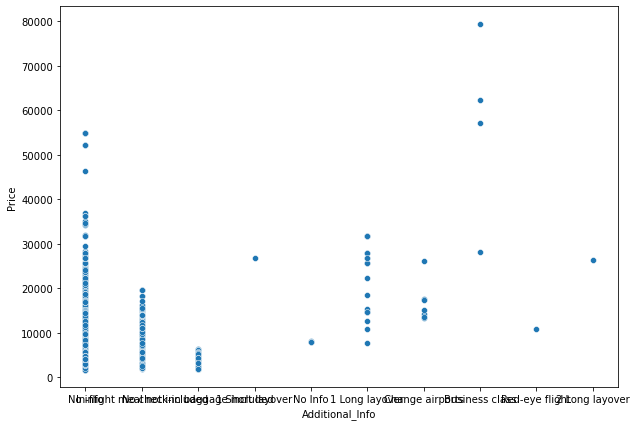

In [226]:
plt.figure(figsize=(10,7))
sns.scatterplot(df1["Additional_Info"],df1["Price"],data=df1)

In [229]:
df1["Additional_Info"].replace({'Change airports':'others','Business class':"others","1 Short layover":"others",'Red eye flight':"othes",'2 Long layover':"others"}, inplace= True)

In [228]:
df2["Additional_Info"].replace({'Change airports':'others','Business class':"others","1 Short layover":"others",'Red eye flight':"othes",'2 Long layover':"others"},inplace= True)

In [230]:
df1["Additional_Info"].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
others                            13
No Info                            3
Red-eye flight                     1
Name: Additional_Info, dtype: int64

# Converting catagorical to numarical

In [241]:
drop_data=df1.drop(['Price'],axis=1)

In [242]:
train_data_catagorical=drop_data.select_dtypes(exclude=['int64','float','int32'])
train_data_numerical=drop_data.select_dtypes(exclude=['int64','float','int32'])

test_data_catagorical=drop_data.select_dtypes(exclude=['int64','float','int32'])
test_data_numerical=drop_data.select_dtypes(exclude=['int64','float','int32'])

In [243]:
from sklearn.preprocessing import LabelEncoder

In [244]:
le=LabelEncoder()
train_data_catagorical=train_data_catagorical.apply(LabelEncoder().fit_transform)
test_data_catagorical=train_data_catagorical.apply(LabelEncoder().fit_transform)

In [248]:
le=LabelEncoder()
train_data_numerical=train_data_numerical.apply(LabelEncoder().fit_transform)
test_data_numerical=train_data_numerical.apply(LabelEncoder().fit_transform)

In [249]:
train_data_numerical.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,4
1,1,3,0,84,4
2,4,2,1,118,4
3,3,3,0,91,4
4,3,0,5,29,4


# Concat

In [250]:
x=pd.concat([train_data_catagorical,train_data_numerical],axis= 1)
y=df1["Price"]
x=pd.concat([test_data_catagorical,test_data_numerical],axis= 1)


In [251]:
final_data=pd.concat([x,y],axis=1)

In [252]:
final_data

,Airline,Source,Destination,Route,Additional_Info,Airline,Source,Destination,Route,Additional_Info,Price
0,3,0,5,18,4,3,0,5,18,4,3897
1,1,3,0,84,4,1,3,0,84,4,7662
2,4,2,1,118,4,4,2,1,118,4,13882
3,3,3,0,91,4,3,3,0,91,4,6218
4,3,0,5,29,4,3,0,5,29,4,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,0,3,0,64,4,4107
10679,1,3,0,64,4,1,3,0,64,4,4145
10680,4,0,2,18,4,4,0,2,18,4,7229
10681,10,0,5,18,4,10,0,5,18,4,12648


In [253]:
x.head()

,Airline,Source,Destination,Route,Additional_Info,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,4,3,0,5,18,4
1,1,3,0,84,4,1,3,0,84,4
2,4,2,1,118,4,4,2,1,118,4
3,3,3,0,91,4,3,3,0,91,4
4,3,0,5,29,4,3,0,5,29,4


In [254]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [255]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")    
    

At random state0,the training accuracy is :- 0.03122221661026159
At random state0,the testing accuracy is :- 0.035482782398348345


At random state1,the training accuracy is :- 0.02967195186075
At random state1,the testing accuracy is :- 0.028348603462640343


At random state2,the training accuracy is :- 0.03503274592282135
At random state2,the testing accuracy is :- 0.011815941643843031


At random state3,the training accuracy is :- 0.030260469733011774
At random state3,the testing accuracy is :- 0.04372167135783467


At random state4,the training accuracy is :- 0.02953834222596563
At random state4,the testing accuracy is :- 0.04477804881998071


At random state5,the training accuracy is :- 0.032541086470054714
At random state5,the testing accuracy is :- 0.030126686372076605


At random state6,the training accuracy is :- 0.03349969494423988
At random state6,the testing accuracy is :- 0.020424798478785422


At random state7,the training accuracy is :- 0.034351144548996904
At random sta

At random state68,the testing accuracy is :- 0.017126631314075436


At random state69,the training accuracy is :- 0.0288037787618457
At random state69,the testing accuracy is :- 0.04698832682293941


At random state70,the training accuracy is :- 0.034368567555575824
At random state70,the testing accuracy is :- 0.022600709951701603


At random state71,the training accuracy is :- 0.03186982112056125
At random state71,the testing accuracy is :- 0.03455208986781666


At random state72,the training accuracy is :- 0.02712955077986623
At random state72,the testing accuracy is :- 0.021276057090343636


At random state73,the training accuracy is :- 0.03158121874832065
At random state73,the testing accuracy is :- 0.03612722516850886


At random state74,the training accuracy is :- 0.033314783887537835
At random state74,the testing accuracy is :- 0.0310076490706499


At random state75,the training accuracy is :- 0.028154265670029655
At random state75,the testing accuracy is :- 0.031763981678994746

In [256]:
x_train

,Airline,Source,Destination,Route,Additional_Info,Airline,Source,Destination,Route,Additional_Info
6751,9,3,0,64,4,9,3,0,64,4
2040,1,2,1,108,4,1,2,1,108,4
2789,3,3,0,64,4,3,3,0,64,4
2285,3,1,4,127,4,3,1,4,127,4
4552,4,0,5,5,4,4,0,5,5,4
...,...,...,...,...,...,...,...,...,...,...
8000,4,0,5,5,1,4,0,5,5,1
1775,4,2,1,102,1,4,2,1,102,1
10121,1,0,5,11,4,1,0,5,11,4
3266,1,2,1,106,4,1,2,1,106,4


In [257]:
y_train

6751      4622
2040      8341
2789      4804
2285      5277
4552     13817
         ...  
8000     11087
1775     15544
10121    10835
3266      6094
7299      8452
Name: Price, Length: 8370, dtype: int64

In [260]:
from math import sqrt

In [263]:
from sklearn.model_selection import RandomizedSearchCV

In [262]:
from sklearn.model_selection import GridSearchCV

In [264]:
from sklearn.tree import DecisionTreeRegressor

In [265]:
from sklearn.neighbors import KNeighborsRegressor

In [281]:
from sklearn.ensemble import RandomForestRegressor

# KNeighborsRegressor

In [266]:
k_range=list(range(1,30))
params=dict(n_neighbors=k_range)
knn_regressor=GridSearchCV( KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [267]:
y_train_pred=knn_regressor.predict(x_train)
y_test_pred=knn_regressor.predict(x_test)

In [268]:
r2_score(y_train.values,y_train_pred)

0.6854102829421883

# DecisionTreeRegressor

In [277]:
depth=list(range(3,30))
param_grid=dict(max_depth=depth)
tree=GridSearchCV(DecisionTreeRegressor(), param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [278]:
y_train_pred=tree.predict(x_train)
y_test_pred=tree.predict(x_test)

In [294]:
r2_score(y_train.values,y_train_pred)

0.7685395612682475

MODEL  is  performing 76% well

In [297]:
R_params={"n_estimators":[100,200,300,400,500],'min_samples_split':[2, 5, 10], "min_samples_leaf":[1, 2, 4]}

In [298]:
random_regressor=RandomizedSearchCV(RandomForestRegressor(), R_params, n_iter=20, scoring=" neg_mean_absolutee_error",cv=5,n_jobs=1)

In [ ]:
random_regressor.fit(x_train,y)

In [296]:
import pickle
filename='Flight prediction.pkl'
pickle.dump(tree,open(filename,'wb'))